In [ ]:
"""Description about datasets:
The dataset which i use here is dowloaded from kaggle.In this dataset we have six column and all of them are descripted below:
1. Rank-> All the channel have assigned some rank according to their subsriber,likes and so on.
2. Grade-> All the channel have assignes some grade according to their positive comments and so on.
3. Chhanel name-> All the channel must have some unique name.
4. Video uploads-> How many videos are uploads.
5. Subsribers-> How many subscribers they have.
6. Video views-> How many views of their entire videos that they uploaded on their channel.

          Our wordking model:
        Data<-->Pre-processing<-->Building Model"""

In [172]:
#import some useful python packages which is used here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [173]:
#Load the dataset:

df=pd.read_csv("youtubedata.csv")

#To view our dataset:

df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757.0,18752951,20869786591
1,2nd,A++,T-Series,12661.0,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251,9793305082
3,4th,A++,SET India,27323.0,31180559,22675948293
4,5th,A++,WWE,36756.0,32852346,26273668433


In [174]:
#As all the columns are useful here building model so we don't need to remove anyone
#Now we have to check whether null value exist or not

df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    6
Subscribers      0
Video views      0
dtype: int64

In [175]:
#Here we see only in column video uploads their is 6 null value exist,so first of all we have to assign 0 in it 
# to avoid null value.

df['Video Uploads']=df['Video Uploads'].fillna(0)

In [176]:
df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

In [177]:
#Now all the null values are removed.
#Let's see the number of column and number of rows:

df.shape

(5000, 6)

In [178]:
#Now we have to see the data type of all columns that's why further it should be helpful for analysis of datasets:

df.dtypes

Rank              object
Grade             object
Channel name      object
Video Uploads    float64
Subscribers       object
Video views        int64
dtype: object

In [179]:
#Let's see the statical summary of numerical data,here we see only two columns
#because describe function only applied on numerical data not on categeorical data
df.describe()

,Video Uploads,Video views
count,5000.000000,5.000000e+03
mean,3854.832200,1.071449e+09
std,17076.132712,2.003844e+09
min,0.000000,7.500000e+01
25%,140.000000,1.862329e+08
50%,441.000000,4.820548e+08
75%,1500.250000,1.124368e+09
max,422326.000000,4.754884e+10


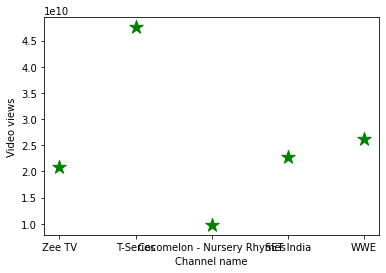

In [180]:
#Demonstrate the scatter plot betwee channel name and videos views
#As there are lot of channel name so using loc function we describe here only five chnnel name

df.loc[0:4].plot(kind='scatter',marker="*",x='Channel name',y='Video views',color='green',s=200)
plt.show()

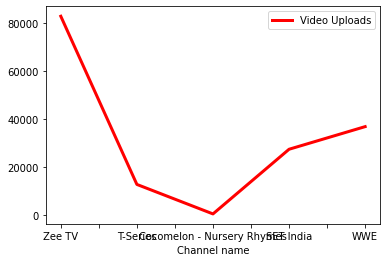

In [181]:
##Demonstrate the line plot betwee channel name and Video Uploads
#As there are lot of channel name so using loc function we describe here only five chnnel name

df.loc[0:4].plot(kind='line',x='Channel name',y='Video Uploads',color='red',linewidth=3)
plt.show()

In [182]:
#As we are not able to demonstrate the bar graph between channel name and subscribers due to because of the 
# datatype of subscribers are in object format so first we need to change it to integer type.

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df['Subscribers']=lc.fit_transform(df['Subscribers'])

In [183]:
#Now the data-type of subscribers is changed from object format to integer type format

df.dtypes['Subscribers']

dtype('int32')

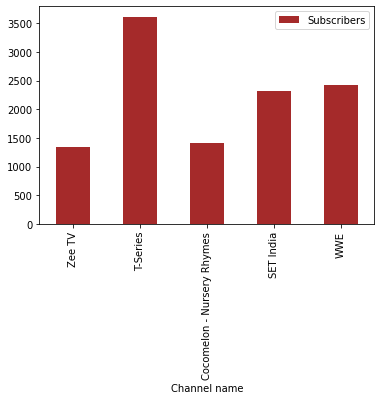

In [184]:
##Demonstrate the bar plot betwee channel name and their subscribers
#As there are lot of channel name so using loc function we describe here only five chnnel name
df.loc[0:4].plot(kind='bar',x='Channel name',y='Subscribers',color='brown')
plt.show()

In [185]:
#Slicing and splitting of Datasets using iloc function :

y=df.iloc[:,1]
x=df.iloc[:,2:]

In [186]:
#Now view the newly created Datasets after splitting the original datasets:

y.head()

0    A++ 
1    A++ 
2    A++ 
3    A++ 
4    A++ 
Name: Grade, dtype: object

In [187]:
x.head()

,Channel name,Video Uploads,Subscribers,Video views
0,Zee TV,82757.0,1348,20869786591
1,T-Series,12661.0,3615,47548839843
2,Cocomelon - Nursery Rhymes,373.0,1407,9793305082
3,SET India,27323.0,2320,22675948293
4,WWE,36756.0,2427,26273668433


In [188]:
#In x datasets we have only one column channel name which have string value data-type,at the time of implementation it may be
# hectic for us so we have to change its data-type into integers types

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
x['Channel name']=lc.fit_transform(x['Channel name'])

In [189]:
x=pd.DataFrame(x)

In [190]:
x.head()

,Channel name,Video Uploads,Subscribers,Video views
0,4293,82757.0,1348,20869786591
1,3525,12661.0,3615,47548839843
2,780,373.0,1407,9793305082
3,3180,27323.0,2320,22675948293
4,4112,36756.0,2427,26273668433


In [199]:
#splitting the datasets for testing and training:
        #  USING RANDOM FOREST METHOD

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=0.10)

In [200]:
#fitting the random forest algorithm to the training set:

classifier=RandomForestClassifier(n_estimators=6,random_state=10,min_samples_split=0.02)
classifier.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=0.02, n_estimators=6, random_state=10)

In [201]:
#predicting the test set results:

y_pred=classifier.predict(x_test)

In [202]:
accuracy_score(y_test,y_pred)

0.68

In [204]:
#splitting the datasets for testing and training:
        #  USING DECISION TREE ANALYSIS

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=0.10)

In [205]:
#fitting the decision tree analysis to the training set:

classifier=DecisionTreeClassifier(random_state=10,min_samples_split=0.02)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=0.02, random_state=10)

In [206]:
#predicting the test set results:

y_pred=classifier.predict(x_test)

In [207]:
accuracy_score(y_test,y_pred)

0.65

In [209]:
#RESULTS:
# RANDOM FOREST METHOD = 68%
# DECISION TREE ANALYSIS = 65%